In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
# v2 gets all the info separately for (1, 1) and (15, 5)

# to make the required inputs, set calculate_chi2_15_5_data and calculate_chi2_1_1_data to true in read_TLee.cxx


# Reading Files

## Pred + Meas

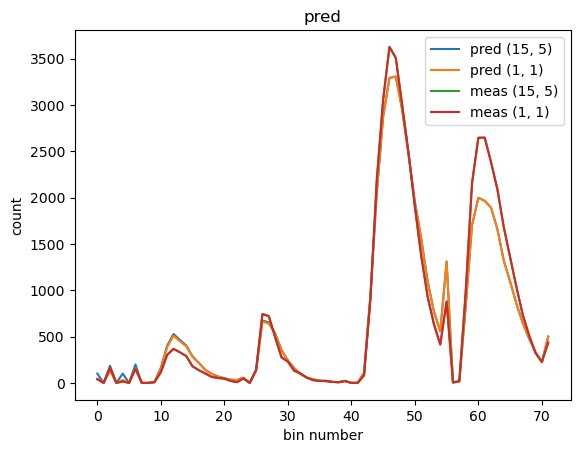

In [3]:
loc = "../TLee_Np0p/cv_and_cov_csv_outputs/lee_15_5/"

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_15_5/pred_newworld.csv") as f:
    line = f.readlines()[0]
    pred_15_5 = np.array([float(x) for x in line.split(",")[:-1]])

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/pred_newworld.csv") as f:
    line = f.readlines()[0]
    pred_1_1 = np.array([float(x) for x in line.split(",")[:-1]])
        
with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_15_5/meas.csv") as f:
    line = f.readlines()[0]
    meas_15_5 = np.array([float(x) for x in line.split(",")[:-1]])

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/meas.csv") as f:
    line = f.readlines()[0]
    meas_1_1 = np.array([float(x) for x in line.split(",")[:-1]])


plt.figure()
plt.plot(pred_15_5, label="pred (15, 5)")
plt.plot(pred_1_1, label="pred (1, 1)")
plt.plot(meas_15_5, label="meas (15, 5)")
plt.plot(meas_1_1, label="meas (1, 1)")

plt.legend()
plt.title("pred")
plt.xlabel("bin number")
plt.ylabel("count")
plt.show()

# measurements should be the same of course

meas = meas_1_1


# Cov Matrices

In [4]:
filenames = [
    "total_cov_no_data_stat_diag",

    "Asimov_data_stat_diag_cov",
    "real_data_stat_cor_cov",
    "mc_stat_diag_cov",
    "mc_stat_cor_cov",

    "flux_cov",
    "Xs_cov",
    "detector_cov",
    "additional_cov",

    # not used
    #"reweight_cor_cov",
    #"reweight_cov",
    #"mc_stat_cov",
]



## (15, 5)

3.762674691196306


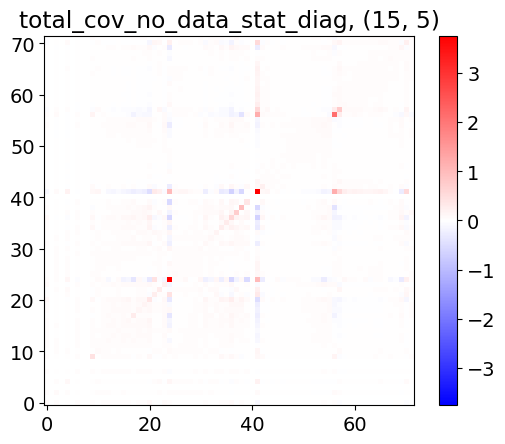

15.415024999205473


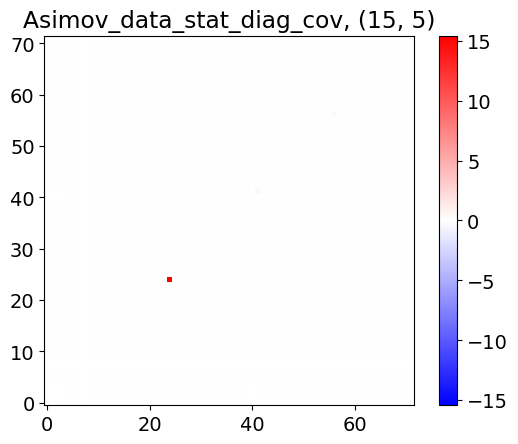

0.0032612813372503257


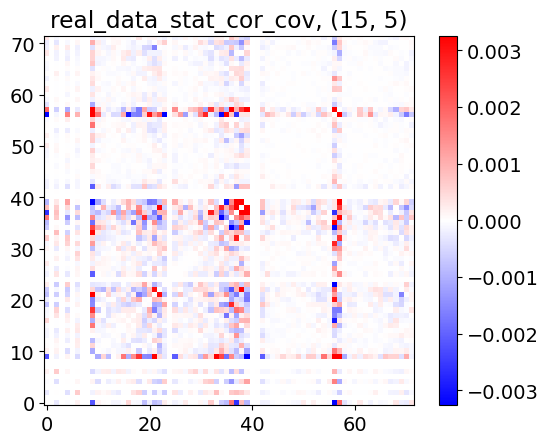

19.40414564430951


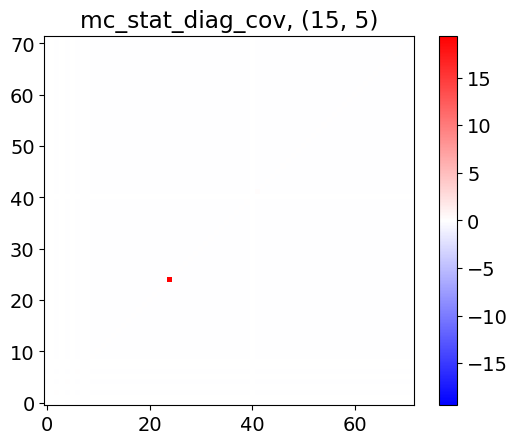

0.02503806655188623


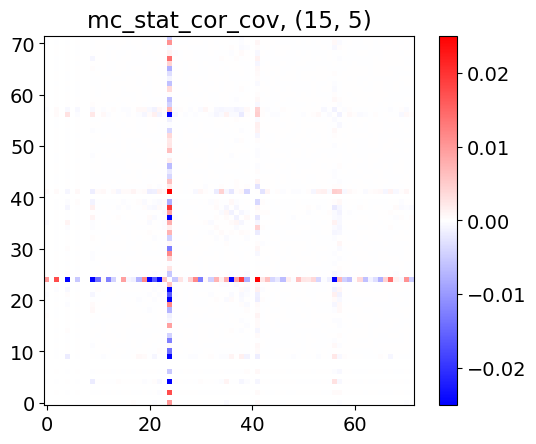

0.04068436826490295


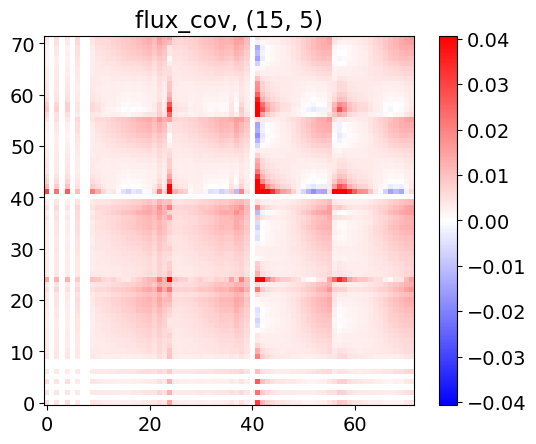

0.06387389995457393


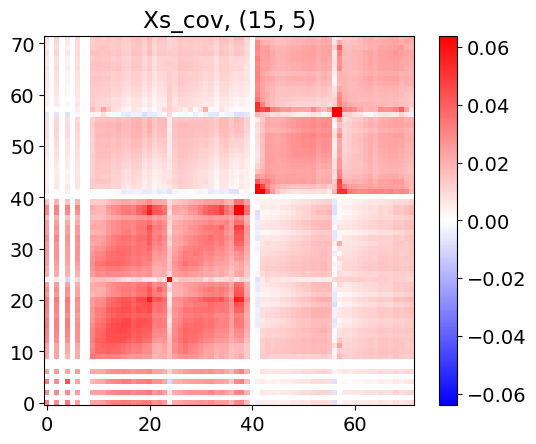

1.3618018996059609


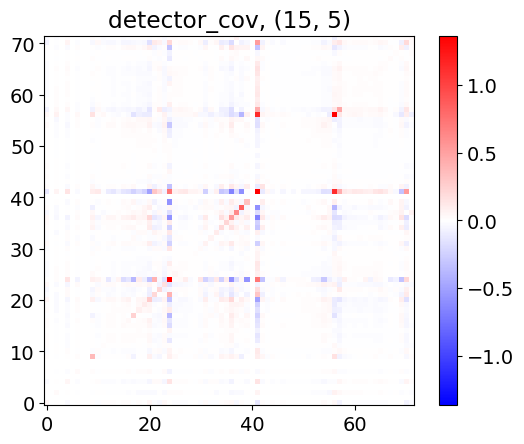

0.003047350423849393


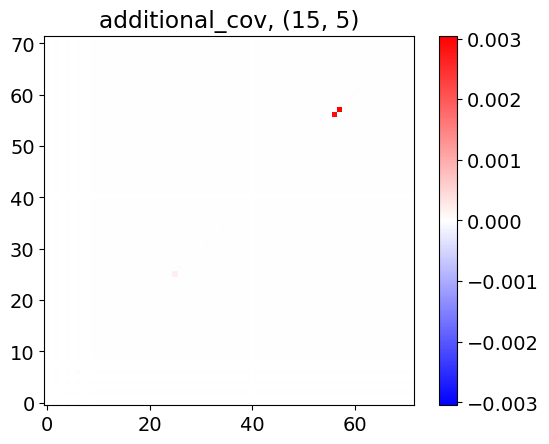

In [27]:
total_cov_no_data_stat_diag_15_5 = -1

Asimov_data_stat_diag_cov_15_5 = -1
real_data_stat_cor_cov_15_5 = -1
mc_stat_diag_cov_15_5 = -1
mc_stat_cor_cov_15_5 = -1

flux_cov_15_5 = -1
Xs_cov_15_5 = -1
detector_cov_15_5 = -1
additional_cov_15_5 = -1

for filename in filenames:
    with open(f"../TLee_Np0p/cv_and_cov_csv_outputs/lee_15_5/{filename}.csv") as f:

        lines = f.readlines()

        dim = len(lines[0].split(",")[:-1])

        temp = np.zeros([dim, dim])
        for i in range(dim):
            temp[i, :] = list(map(float, lines[i].split(",")[:-1]))

    plt.figure()

    mat = temp / np.outer(pred_15_5, pred_15_5)

    mat_vals = mat.flatten()
    nonzero_vals = mat_vals[np.abs(mat_vals) > 1e-10]
    mat_std = 5*np.std(np.nan_to_num(nonzero_vals, nan=0, posinf=0, neginf=0))
    print(mat_std)

    plt.imshow(mat, origin="lower", vmin=-mat_std, vmax=mat_std, cmap="bwr")
    plt.colorbar()
    plt.title(f"{filename}, (15, 5)")
    plt.show()

    globals()[filename + "_15_5"] = temp


## (1,1)

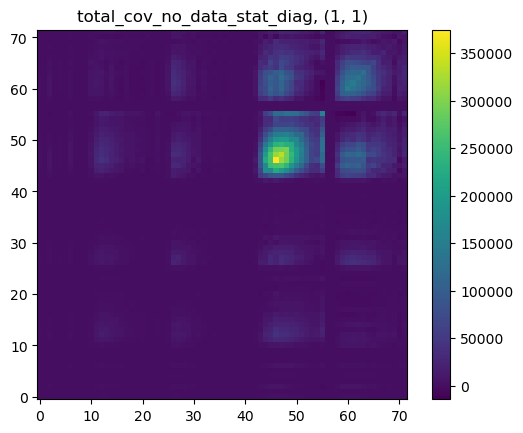

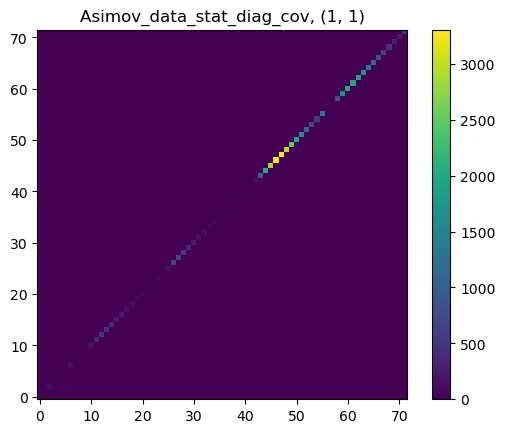

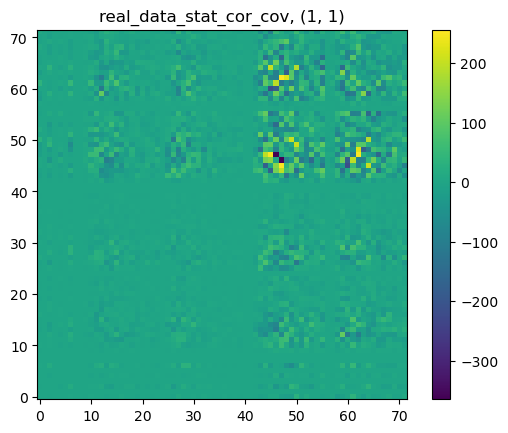

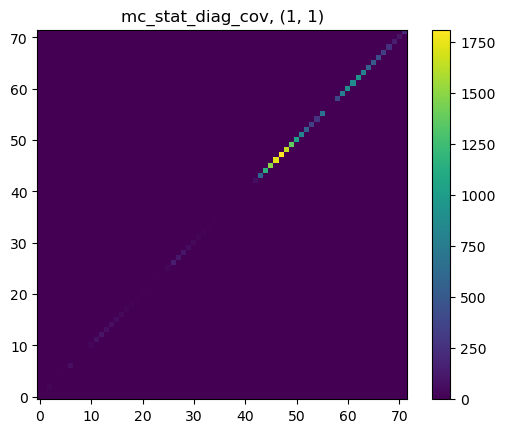

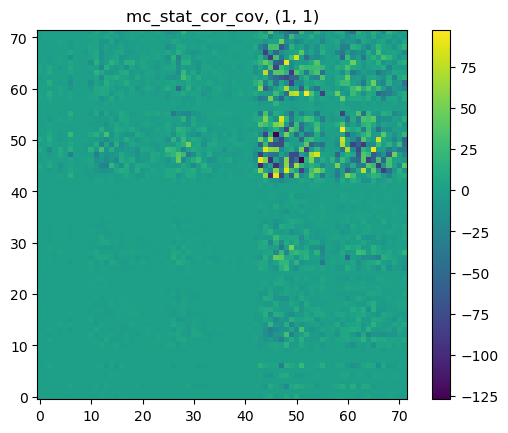

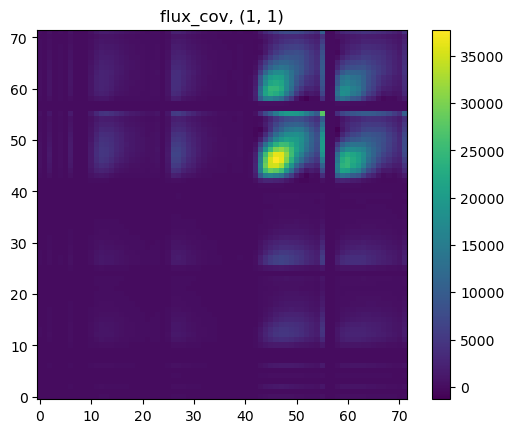

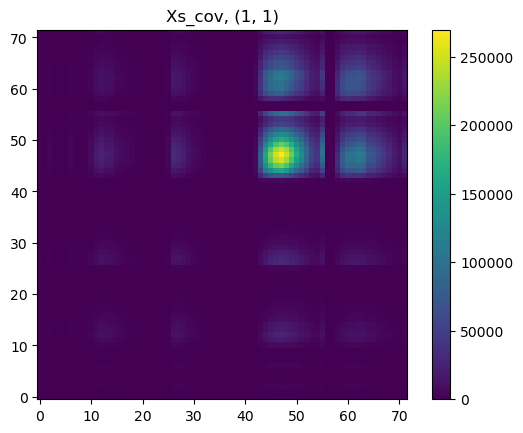

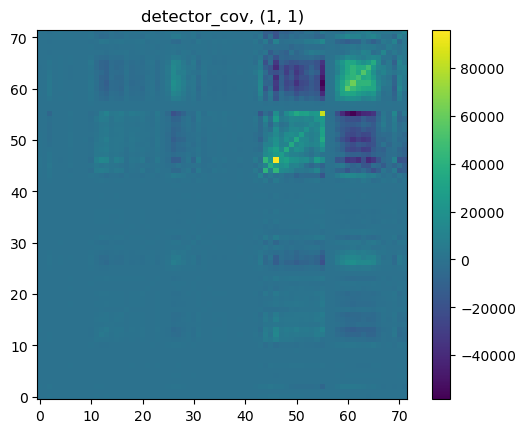

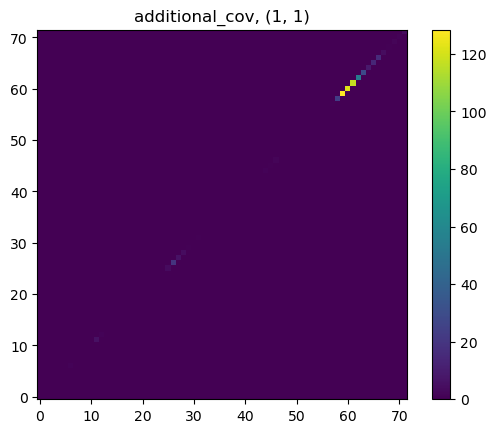

In [6]:
total_cov_no_data_stat_diag_1_1 = -1

Asimov_data_stat_diag_cov_1_1 = -1
real_data_stat_cor_cov_1_1 = -1
mc_stat_diag_cov_1_1 = -1
mc_stat_cor_cov_1_1 = -1

flux_cov_1_1 = -1
Xs_cov_1_1 = -1
detector_cov_1_1 = -1
additional_cov_1_1 = -1

for filename in filenames:
    with open(f"../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/{filename}.csv") as f:

        lines = f.readlines()

        dim = len(lines[0].split(",")[:-1])

        temp = np.zeros([dim, dim])
        for i in range(dim):
            temp[i, :] = list(map(float, lines[i].split(",")[:-1]))

    plt.figure()
    plt.imshow(temp, origin="lower")
    plt.colorbar()
    plt.title(f"{filename}, (1, 1)")
    plt.show()

    globals()[filename + "_1_1"] = temp


# Diagonal Uncertainties

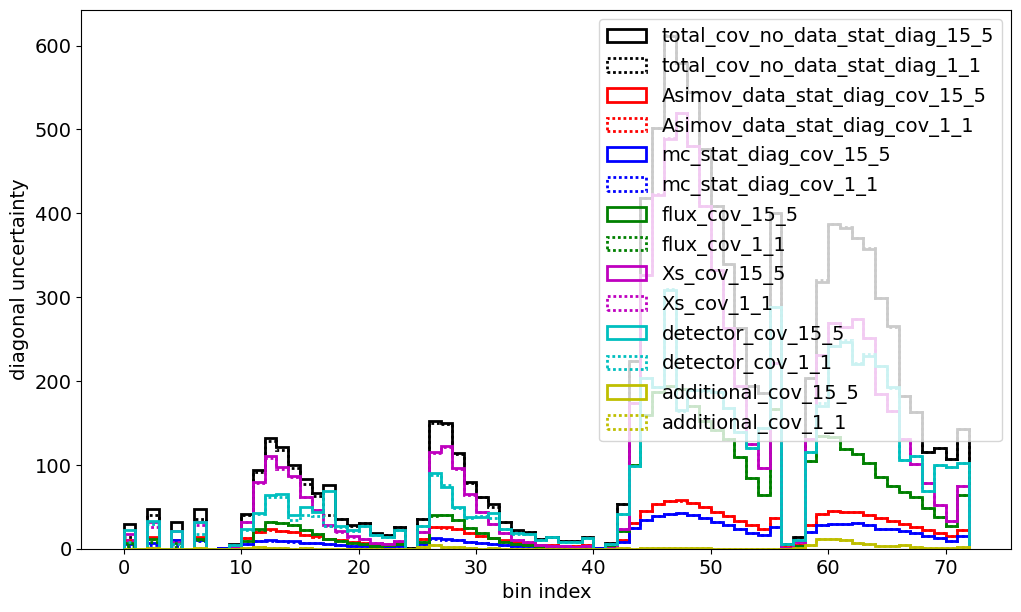

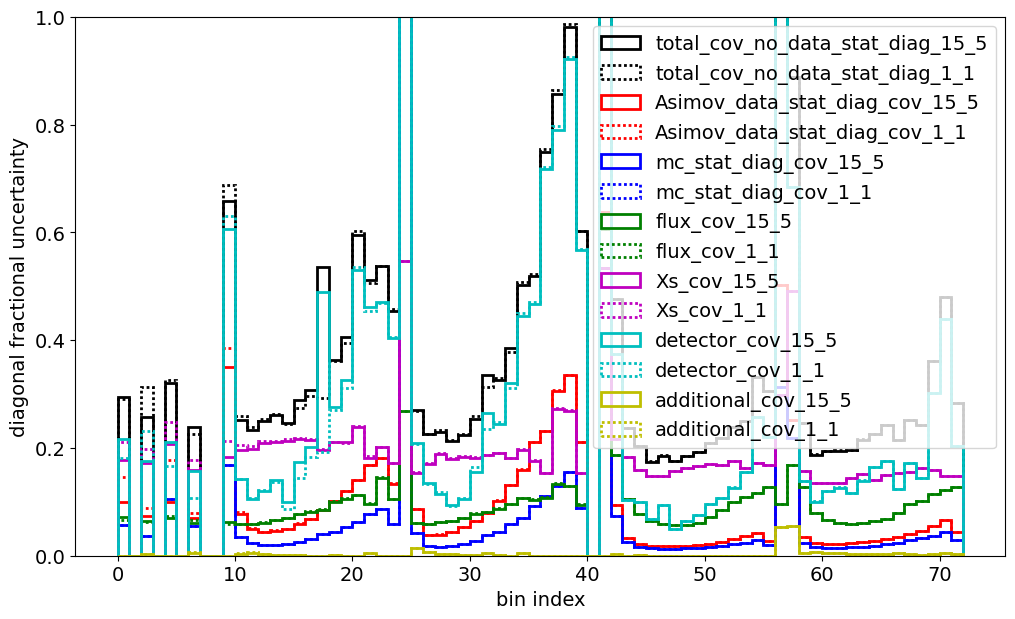

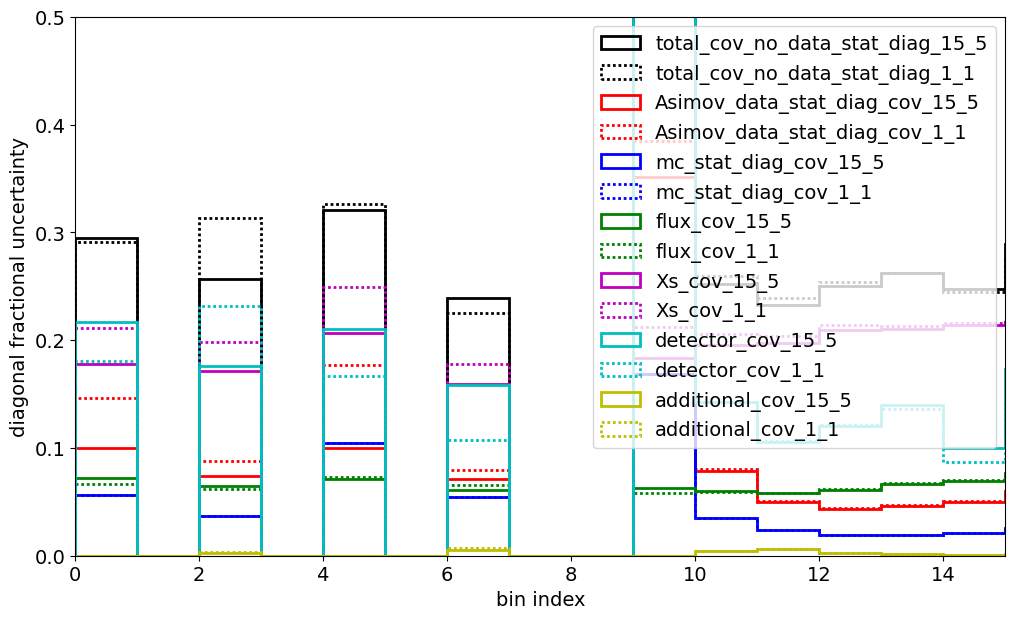

In [7]:
total_cov_no_data_stat_diag_15_5_diag = np.diag(total_cov_no_data_stat_diag_15_5)
total_cov_no_data_stat_diag_1_1_diag = np.diag(total_cov_no_data_stat_diag_1_1)
Asimov_data_stat_diag_cov_15_5_diag = np.diag(Asimov_data_stat_diag_cov_15_5)
Asimov_data_stat_diag_cov_1_1_diag = np.diag(Asimov_data_stat_diag_cov_1_1)
mc_stat_diag_cov_15_5_diag = np.diag(mc_stat_diag_cov_15_5)
mc_stat_diag_cov_1_1_diag = np.diag(mc_stat_diag_cov_1_1)
mc_stat_cor_cov_15_5_diag = np.diag(mc_stat_cor_cov_15_5)
mc_stat_cor_cov_1_1_diag = np.diag(mc_stat_cor_cov_1_1)
flux_cov_15_5_diag = np.diag(flux_cov_15_5)
flux_cov_1_1_diag = np.diag(flux_cov_1_1)
Xs_cov_15_5_diag = np.diag(Xs_cov_15_5)
Xs_cov_1_1_diag = np.diag(Xs_cov_1_1)
detector_cov_15_5_diag = np.diag(detector_cov_15_5)
detector_cov_1_1_diag = np.diag(detector_cov_1_1)
additional_cov_15_5_diag = np.diag(additional_cov_15_5)
additional_cov_1_1_diag = np.diag(additional_cov_1_1)

total_cov_no_data_stat_diag_15_5_err = np.sqrt(total_cov_no_data_stat_diag_15_5_diag)
total_cov_no_data_stat_diag_1_1_err = np.sqrt(total_cov_no_data_stat_diag_1_1_diag)
Asimov_data_stat_diag_cov_15_5_err = np.sqrt(Asimov_data_stat_diag_cov_15_5_diag)
Asimov_data_stat_diag_cov_1_1_err = np.sqrt(Asimov_data_stat_diag_cov_1_1_diag)
mc_stat_diag_cov_15_5_err = np.sqrt(mc_stat_diag_cov_15_5_diag)
mc_stat_diag_cov_1_1_err = np.sqrt(mc_stat_diag_cov_1_1_diag)
flux_cov_15_5_err = np.sqrt(flux_cov_15_5_diag)
flux_cov_1_1_err = np.sqrt(flux_cov_1_1_diag)
Xs_cov_15_5_err = np.sqrt(Xs_cov_15_5_diag)
Xs_cov_1_1_err = np.sqrt(Xs_cov_1_1_diag)
detector_cov_15_5_err = np.sqrt(detector_cov_15_5_diag)
detector_cov_1_1_err = np.sqrt(detector_cov_1_1_diag)
additional_cov_15_5_err = np.sqrt(additional_cov_15_5_diag)
additional_cov_1_1_err = np.sqrt(additional_cov_1_1_diag)

np.seterr(divide='ignore', invalid='ignore')
total_cov_no_data_stat_diag_15_5_frac_err = np.nan_to_num(total_cov_no_data_stat_diag_15_5_err / pred_15_5, nan=0, posinf=0, neginf=0)
total_cov_no_data_stat_diag_1_1_frac_err = np.nan_to_num(total_cov_no_data_stat_diag_1_1_err / pred_1_1, nan=0, posinf=0, neginf=0)
Asimov_data_stat_diag_cov_15_5_frac_err = np.nan_to_num(Asimov_data_stat_diag_cov_15_5_err / pred_15_5, nan=0, posinf=0, neginf=0)
Asimov_data_stat_diag_cov_1_1_frac_err = np.nan_to_num(Asimov_data_stat_diag_cov_1_1_err / pred_1_1, nan=0, posinf=0, neginf=0)
mc_stat_diag_cov_15_5_frac_err = np.nan_to_num(mc_stat_diag_cov_15_5_err / pred_15_5, nan=0, posinf=0, neginf=0)
mc_stat_diag_cov_1_1_frac_err = np.nan_to_num(mc_stat_diag_cov_1_1_err / pred_1_1, nan=0, posinf=0, neginf=0)
flux_cov_15_5_frac_err = np.nan_to_num(flux_cov_15_5_err / pred_15_5, nan=0, posinf=0, neginf=0)
flux_cov_1_1_frac_err = np.nan_to_num(flux_cov_1_1_err / pred_1_1, nan=0, posinf=0, neginf=0)
Xs_cov_15_5_frac_err = np.nan_to_num(Xs_cov_15_5_err / pred_15_5, nan=0, posinf=0, neginf=0)
Xs_cov_1_1_frac_err = np.nan_to_num(Xs_cov_1_1_err / pred_1_1, nan=0, posinf=0, neginf=0)
detector_cov_15_5_frac_err = np.nan_to_num(detector_cov_15_5_err / pred_15_5, nan=0, posinf=0, neginf=0)
detector_cov_1_1_frac_err = np.nan_to_num(detector_cov_1_1_err / pred_1_1, nan=0, posinf=0, neginf=0)
additional_cov_15_5_frac_err = np.nan_to_num(additional_cov_15_5_err / pred_15_5, nan=0, posinf=0, neginf=0)
additional_cov_1_1_frac_err = np.nan_to_num(additional_cov_1_1_err / pred_1_1, nan=0, posinf=0, neginf=0)

bins = np.linspace(0, len(pred_15_5), len(pred_15_5) + 1)
bin_centers = (bins[1:] + bins[:-1]) / 2

mpl.rcParams['font.size'] = 14
lw = 2

plt.figure(figsize=(12, 7))
plt.hist(bin_centers, weights=total_cov_no_data_stat_diag_15_5_err, bins=bins, histtype="step", lw=lw, color="k", ls="-", label="total_cov_no_data_stat_diag_15_5")
plt.hist(bin_centers, weights=total_cov_no_data_stat_diag_1_1_err, bins=bins, histtype="step", lw=lw, color="k", ls=(0, (1, 1)), label="total_cov_no_data_stat_diag_1_1")
plt.hist(bin_centers, weights=Asimov_data_stat_diag_cov_15_5_err, bins=bins, histtype="step", lw=lw, color="r", ls="-", label="Asimov_data_stat_diag_cov_15_5")
plt.hist(bin_centers, weights=Asimov_data_stat_diag_cov_1_1_err, bins=bins, histtype="step", lw=lw, color="r", ls=(0, (1, 1)), label="Asimov_data_stat_diag_cov_1_1")
plt.hist(bin_centers, weights=mc_stat_diag_cov_15_5_err, bins=bins, histtype="step", lw=lw, color="b", ls="-", label="mc_stat_diag_cov_15_5")
plt.hist(bin_centers, weights=mc_stat_diag_cov_1_1_err, bins=bins, histtype="step", lw=lw, color="b", ls=(0, (1, 1)), label="mc_stat_diag_cov_1_1")
plt.hist(bin_centers, weights=flux_cov_15_5_err, bins=bins, histtype="step", lw=lw, color="g", ls="-", label="flux_cov_15_5")
plt.hist(bin_centers, weights=flux_cov_1_1_err, bins=bins, histtype="step", lw=lw, color="g", ls=(0, (1, 1)), label="flux_cov_1_1")
plt.hist(bin_centers, weights=Xs_cov_15_5_err, bins=bins, histtype="step", lw=lw, color="m", ls="-", label="Xs_cov_15_5")
plt.hist(bin_centers, weights=Xs_cov_1_1_err, bins=bins, histtype="step", lw=lw, color="m", ls=(0, (1, 1)), label="Xs_cov_1_1")
plt.hist(bin_centers, weights=detector_cov_15_5_err, bins=bins, histtype="step", lw=lw, color="c", ls="-", label="detector_cov_15_5")
plt.hist(bin_centers, weights=detector_cov_1_1_err, bins=bins, histtype="step", lw=lw, color="c", ls=(0, (1, 1)), label="detector_cov_1_1")
plt.hist(bin_centers, weights=additional_cov_15_5_err, bins=bins, histtype="step", lw=lw, color="y", ls="-", label="additional_cov_15_5")
plt.hist(bin_centers, weights=additional_cov_1_1_err, bins=bins, histtype="step", lw=lw, color="y", ls=(0, (1, 1)), label="additional_cov_1_1")
plt.xlabel("bin index")
plt.ylabel("diagonal uncertainty")
plt.legend()
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(12, 7))
plt.hist(bin_centers, weights=total_cov_no_data_stat_diag_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="k", ls="-", label="total_cov_no_data_stat_diag_15_5")
plt.hist(bin_centers, weights=total_cov_no_data_stat_diag_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="k", ls=(0, (1, 1)), label="total_cov_no_data_stat_diag_1_1")
plt.hist(bin_centers, weights=Asimov_data_stat_diag_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="r", ls="-", label="Asimov_data_stat_diag_cov_15_5")
plt.hist(bin_centers, weights=Asimov_data_stat_diag_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="r", ls=(0, (1, 1)), label="Asimov_data_stat_diag_cov_1_1")
plt.hist(bin_centers, weights=mc_stat_diag_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="b", ls="-", label="mc_stat_diag_cov_15_5")
plt.hist(bin_centers, weights=mc_stat_diag_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="b", ls=(0, (1, 1)), label="mc_stat_diag_cov_1_1")
plt.hist(bin_centers, weights=flux_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="g", ls="-", label="flux_cov_15_5")
plt.hist(bin_centers, weights=flux_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="g", ls=(0, (1, 1)), label="flux_cov_1_1")
plt.hist(bin_centers, weights=Xs_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="m", ls="-", label="Xs_cov_15_5")
plt.hist(bin_centers, weights=Xs_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="m", ls=(0, (1, 1)), label="Xs_cov_1_1")
plt.hist(bin_centers, weights=detector_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="c", ls="-", label="detector_cov_15_5")
plt.hist(bin_centers, weights=detector_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="c", ls=(0, (1, 1)), label="detector_cov_1_1")
plt.hist(bin_centers, weights=additional_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="y", ls="-", label="additional_cov_15_5")
plt.hist(bin_centers, weights=additional_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="y", ls=(0, (1, 1)), label="additional_cov_1_1")
plt.xlabel("bin index")
plt.ylabel("diagonal fractional uncertainty")
plt.ylim(0, 1)
plt.legend(loc="upper right")
plt.show()


plt.figure(figsize=(12, 7))
plt.hist(bin_centers, weights=total_cov_no_data_stat_diag_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="k", ls="-", label="total_cov_no_data_stat_diag_15_5")
plt.hist(bin_centers, weights=total_cov_no_data_stat_diag_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="k", ls=(0, (1, 1)), label="total_cov_no_data_stat_diag_1_1")
plt.hist(bin_centers, weights=Asimov_data_stat_diag_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="r", ls="-", label="Asimov_data_stat_diag_cov_15_5")
plt.hist(bin_centers, weights=Asimov_data_stat_diag_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="r", ls=(0, (1, 1)), label="Asimov_data_stat_diag_cov_1_1")
plt.hist(bin_centers, weights=mc_stat_diag_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="b", ls="-", label="mc_stat_diag_cov_15_5")
plt.hist(bin_centers, weights=mc_stat_diag_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="b", ls=(0, (1, 1)), label="mc_stat_diag_cov_1_1")
plt.hist(bin_centers, weights=flux_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="g", ls="-", label="flux_cov_15_5")
plt.hist(bin_centers, weights=flux_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="g", ls=(0, (1, 1)), label="flux_cov_1_1")
plt.hist(bin_centers, weights=Xs_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="m", ls="-", label="Xs_cov_15_5")
plt.hist(bin_centers, weights=Xs_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="m", ls=(0, (1, 1)), label="Xs_cov_1_1")
plt.hist(bin_centers, weights=detector_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="c", ls="-", label="detector_cov_15_5")
plt.hist(bin_centers, weights=detector_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="c", ls=(0, (1, 1)), label="detector_cov_1_1")
plt.hist(bin_centers, weights=additional_cov_15_5_frac_err, bins=bins, histtype="step", lw=lw, color="y", ls="-", label="additional_cov_15_5")
plt.hist(bin_centers, weights=additional_cov_1_1_frac_err, bins=bins, histtype="step", lw=lw, color="y", ls=(0, (1, 1)), label="additional_cov_1_1")
plt.xlabel("bin index")
plt.ylabel("diagonal fractional uncertainty")
plt.xlim(0, 15)
plt.ylim(0, 0.5)
plt.legend(loc="upper right")
plt.show()


# Chi2 Tests

## WC+gLEE

In [8]:
total_cov_15_5 = total_cov_no_data_stat_diag_15_5 + Asimov_data_stat_diag_cov_15_5
total_cov_1_1 = total_cov_no_data_stat_diag_1_1 + Asimov_data_stat_diag_cov_1_1

delta_15_5 = pred_15_5 - meas
delta_1_1 = pred_1_1 - meas

chi2_15_5 = delta_15_5 @ np.linalg.inv(total_cov_15_5) @ delta_15_5
chi2_1_1 = delta_1_1 @ np.linalg.inv(total_cov_1_1) @ delta_1_1

print("data vs (15, 5) pred chi2 (WC+gLEE): ", chi2_15_5)
print("data vs (1, 1) pred chi2 (WC+gLEE): ", chi2_1_1)


data vs (15, 5) pred chi2 (WC+gLEE):  56.998601084265815
data vs (1, 1) pred chi2 (WC+gLEE):  46.2699659226016


## WC Only

In [9]:
wc_only_meas = np.concatenate([meas[:4], meas[8:]])

wc_only_pred_15_5 = np.concatenate([pred_15_5[:4], pred_15_5[8:]])
wc_only_pred_1_1 = np.concatenate([pred_1_1[:4], pred_1_1[8:]])

wc_only_total_cov_15_5_rows = np.concatenate([total_cov_15_5[:4], total_cov_15_5[8:]], axis=0)
wc_only_total_cov_15_5 = np.concatenate([wc_only_total_cov_15_5_rows[:, :4], wc_only_total_cov_15_5_rows[:, 8:]], axis=1)

wc_only_total_cov_1_1_rows = np.concatenate([total_cov_1_1[:4], total_cov_1_1[8:]], axis=0)
wc_only_total_cov_1_1 = np.concatenate([wc_only_total_cov_1_1_rows[:, :4], wc_only_total_cov_1_1_rows[:, 8:]], axis=1)

wc_only_delta_15_5 = wc_only_pred_15_5 - wc_only_meas
wc_only_delta_1_1 = wc_only_pred_1_1 - wc_only_meas

wc_only_chi2_15_5 = wc_only_delta_15_5 @ np.linalg.inv(wc_only_total_cov_15_5) @ wc_only_delta_15_5
wc_only_chi2_1_1 = wc_only_delta_1_1 @ np.linalg.inv(wc_only_total_cov_1_1) @ wc_only_delta_1_1

print("data vs (15, 5) pred chi2 (WC only): ", wc_only_chi2_15_5)
print("data vs (1, 1) pred chi2 (WC only): ", wc_only_chi2_1_1)

# wc_only from c++: 
# (15, 5): 50.9965
# (1, 1): 44.9613
# agrees!


data vs (15, 5) pred chi2 (WC only):  50.09935208975673
data vs (1, 1) pred chi2 (WC only):  44.53817449064485


## WC Only Constrained

In [10]:
wc_only_meas_X, wc_only_meas_Y = wc_only_meas[:4], wc_only_meas[4:]

wc_only_pred_15_5_X, wc_only_pred_15_5_Y = wc_only_pred_15_5[:4], wc_only_pred_15_5[4:]
wc_only_pred_1_1_X, wc_only_pred_1_1_Y = wc_only_pred_1_1[:4], wc_only_pred_1_1[4:]

wc_only_total_cov_15_5_XX, wc_only_total_cov_15_5_YY, wc_only_total_cov_15_5_XY = wc_only_total_cov_15_5[:4, :4], wc_only_total_cov_15_5[4:, 4:], wc_only_total_cov_15_5[:4, 4:]
wc_only_total_cov_1_1_XX, wc_only_total_cov_1_1_YY, wc_only_total_cov_1_1_XY = wc_only_total_cov_1_1[:4, :4], wc_only_total_cov_1_1[4:, 4:], wc_only_total_cov_1_1[:4, 4:]

pred_15_5_X_constr = wc_only_pred_15_5_X + wc_only_total_cov_15_5_XY @ np.linalg.inv(wc_only_total_cov_15_5_YY) @ (wc_only_meas_Y - wc_only_pred_15_5_Y)
pred_1_1_X_constr = wc_only_pred_1_1_X + wc_only_total_cov_1_1_XY @ np.linalg.inv(wc_only_total_cov_1_1_YY) @ (wc_only_meas_Y - wc_only_pred_1_1_Y)

cov_15_15_XX_constr = wc_only_total_cov_15_5_XX - wc_only_total_cov_15_5_XY @ np.linalg.inv(wc_only_total_cov_15_5_YY) @ wc_only_total_cov_15_5_XY.T
cov_1_1_XX_constr = wc_only_total_cov_1_1_XX - wc_only_total_cov_1_1_XY @ np.linalg.inv(wc_only_total_cov_1_1_YY) @ wc_only_total_cov_1_1_XY.T

delta_15_5_X_constr = pred_15_5_X_constr - wc_only_meas_X
delta_1_1_X_constr = pred_1_1_X_constr - wc_only_meas_X

chi2_15_5_X_constr = delta_15_5_X_constr @ np.linalg.inv(cov_15_15_XX_constr) @ delta_15_5_X_constr
chi2_1_1_X_constr = delta_1_1_X_constr @ np.linalg.inv(cov_1_1_XX_constr) @ delta_1_1_X_constr

print("data vs (15, 5) pred chi2 (WC only, constrained): ", chi2_15_5_X_constr)
print("data vs (1, 1) pred chi2 (WC only, constrained): ", chi2_1_1_X_constr)



data vs (15, 5) pred chi2 (WC only, constrained):  5.503506160278624
data vs (1, 1) pred chi2 (WC only, constrained):  0.7922971038657759


In [11]:
wc_only_meas_X

array([ 40.,   0., 164.,   0.])

In [12]:
pred_15_5_X_constr

array([ 82.17282965,   0.        , 201.00823589,   0.        ])

In [13]:
pred_1_1_X_constr

array([ 41.47130679,   0.        , 145.22796834,   0.        ])